# Chest Xray for Phenumonia Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from google.colab import drive
drive.mount('/content.drive')
drive.mount('/content/drive', force_remount=True)  # To Fix transport endpoint not connected issue

Mounted at /content.drive
Mounted at /content/drive


# Load Images

## Data For Training - Processing

In [3]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1/255.0
)   # Creating an object, that just hold the data, 1 image. 

train_images = train_data_gen.flow_from_directory(             
    'drive/MyDrive/Dataset/chest_xray/train',      
    batch_size = 32,
    target_size = (228, 228)
)


Found 5238 images belonging to 2 classes.


In [4]:
valid_data_gen = tf.keras.preprocessing.image.ImageDataGenerator (
    rescale = 1 / 255.0     # 1/255 works little better, any value can be applied, depending dataset can be differet, 1 mean 1 imamge
) 

valid_images = valid_data_gen.flow_from_directory (
    'drive/MyDrive/Dataset/chest_xray/test',
    batch_size = 26,                             # total 624 image, which I want to keep in 26 batch so divided by 26
    target_size = (228, 228)

)

Found 624 images belonging to 2 classes.


In [5]:
next(valid_images)[1]  # in output where 1 indicates that the disease belong to that class, lables properly stored in one hot encoded

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [6]:
next(valid_images) [0] # Image stored when index 0

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.02745098, 0.02745098, 0.02745098],
         [0.04313726, 0.04313726, 0.04313726],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.01176471, 0.01176471, 0.01176471],
         [0.02352941, 0.02352941, 0.02352941],
         [0.04705883, 0.04705883, 0.04705883],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.03137255, 0.03137255, 0.03137255],
         [0.04313726, 0.04313726, 0.04313726],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

# Creating Method or Function

In [34]:
def plotLoss(history: pd.DataFrame):
  plt.figure(figsize=(12,14))
  plt.plot(history.index.values,
           history['loss'], label='Traning Error', color='purple', linewidth=4)
  plt.plot(history.index.values,
           history['val_loss'], label='Validation Error', color='green', linewidth=4)
  
  plt.legend()
  plt.grid(True)
  plt.show()

def plotAccuracy(history: pd.DataFrame):
  plt.figure(figsize=(12,14))
  plt.plot(history.index.values,
           history['accuracy'], label='Training Accuracy', color='purple', linewidth=4)
  plt.plot(history.index.values,
           history['val_accuracy'], label='Validation Accuracy', color='green', linewidth=4)
  
  plt.legend()
  plt.grid(True)
  plt.show()

# CNN

## Inialize / Model Building

In [19]:
cnn = tf.keras.Sequential([
        # Convolution Feature Extraction                 # First layer is convolutional layer, normalization can also be applied, its optional
        tf.keras.layers.Conv2D(                          # There are also 1D, 2D & 3D available
           filters=32, kernel_size=(3,3),
           strides=(1,1), activation='relu',
           input_shape=(228, 228, 3), padding='same'     # Since its first layer, its dont know enough, so input spape must be defined, so that it can understand
        ), 


        # Dimesionality Reduction                     # After 1st conv, there are so many dimenstion, that must be reduced
        tf.keras.layers.MaxPool2D(                    # Maxpool 2D, becuause our filter/ Cov2D, so its must be 2D
           pool_size=(2,2), strides=(1,1), padding='same'
        ),

        
        # Batch Normalization                        # Batch Normalization works better for image processing
        tf.keras.layers.BatchNormalization(),         # after normalization, still its in image for, so need to covert into 1D array
        tf.keras.layers.Flatten(),                  # Flatting for converting 1D array


        # fulluy Connected Network                            # Connecting Artifician Neuron Network
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.3, seed=42),              # regularization: dropout, earlystopping, cotroll randomness, seed 42
        tf.keras.layers.Dense(units=2, activation='sigmoid')    # Binary : Unit 2 with sigmoid
])

## Compilation

In [21]:
cnn.compile (
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # For calculation loss of multi class / >= 2 class with integar 
    metrics = ['accuracy']
)

In [22]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Fit the Model

In [23]:
with tf.device ('/device:GPU:0') :
  cnn.fit(
      train_images,
      epochs = 25,
      validation_data = valid_images

  )

Epoch 1/25
164/164 [==============================] - 1479s 9s/step - loss: 9.0910 - accuracy: 0.9047 - val_loss: 1.1624 - val_accuracy: 0.8526
Epoch 2/25
164/164 [==============================] - 66s 404ms/step - loss: 0.1459 - accuracy: 0.9513 - val_loss: 0.9290 - val_accuracy: 0.8029
Epoch 3/25
164/164 [==============================] - 65s 399ms/step - loss: 0.0999 - accuracy: 0.9645 - val_loss: 0.9659 - val_accuracy: 0.8638
Epoch 4/25
164/164 [==============================] - 66s 405ms/step - loss: 0.0634 - accuracy: 0.9737 - val_loss: 1.0847 - val_accuracy: 0.8333
Epoch 5/25
164/164 [==============================] - 65s 397ms/step - loss: 0.1203 - accuracy: 0.9555 - val_loss: 1.0060 - val_accuracy: 0.8894
Epoch 6/25
164/164 [==============================] - 65s 399ms/step - loss: 0.0636 - accuracy: 0.9712 - val_loss: 0.2855 - val_accuracy: 0.9295
Epoch 7/25
164/164 [==============================] - 67s 406ms/step - loss: 0.0450 - accuracy: 0.9807 - val_loss: 0.9931 - val_acc

# Model Summary

In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 228, 228, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 228, 228, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 228, 228, 32)     128       
 hNormalization)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 1663488)           0         
                                                                 
 dense_2 (Dense)             (None, 128)               212926592 
                                                                 
 dropout_1 (Dropout)         (None, 128)              

In [25]:
hist = pd.DataFrame(cnn.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,9.091019,0.904735,1.162362,0.852564
1,0.145852,0.951317,0.929043,0.802885
2,0.099924,0.964490,0.965923,0.863782
3,0.063422,0.973654,1.084691,0.833333
4,0.120331,0.955517,1.006022,0.889423
5,0.063634,0.971172,0.285548,0.929487
6,0.044965,0.980718,0.993068,0.855769
7,0.044052,0.985682,1.130202,0.891026
8,0.039936,0.984536,1.503837,0.793269
9,0.043041,0.985682,1.602536,0.822115


# Plotting Error

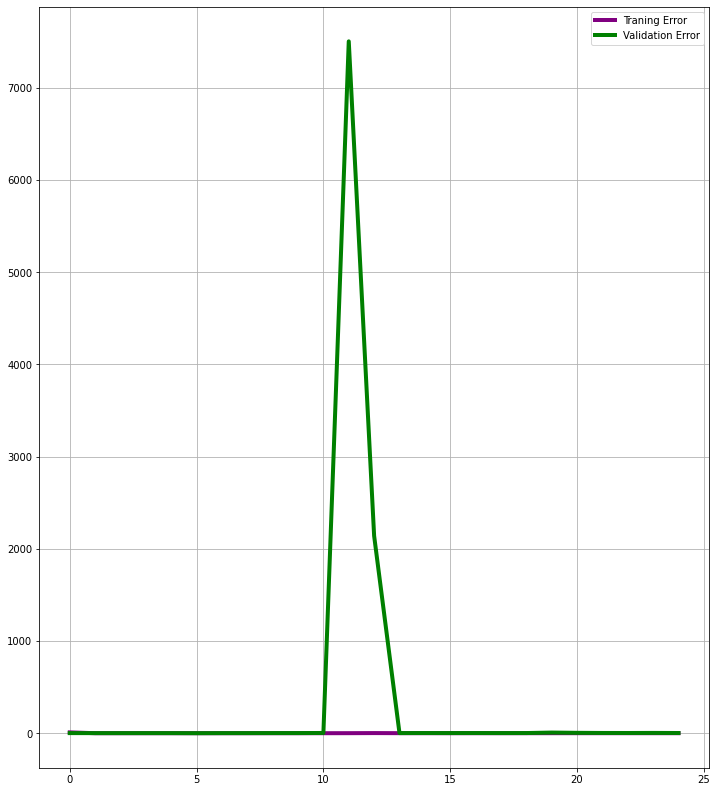

In [26]:
plotLoss(hist)

# Plotting Accuracy

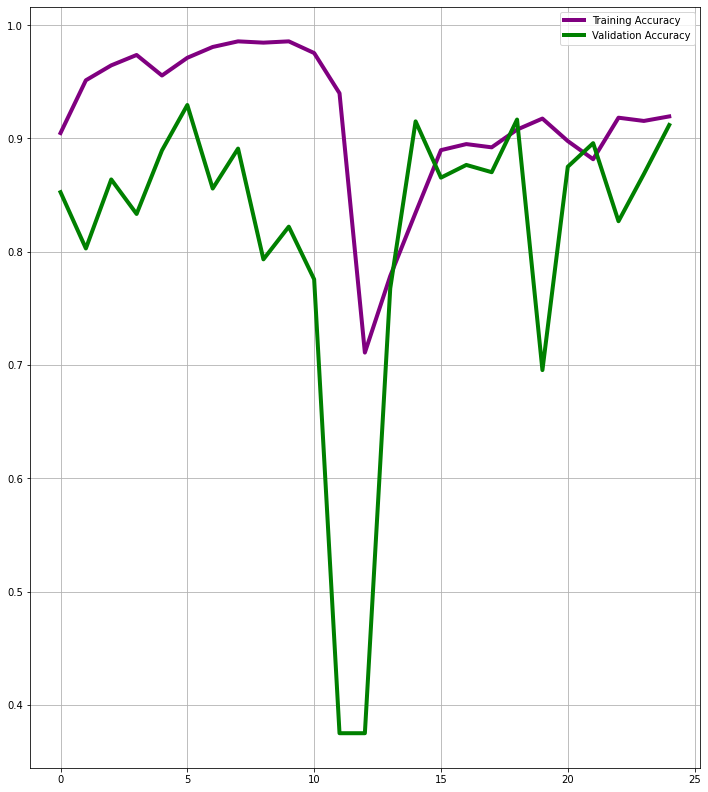

In [35]:
plotAccuracy(hist)